In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = '/content/drive/MyDrive/生醫智慧工程/train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [84]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [85]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


上面程式碼用來分開資料集>>分為train跟test資料集

In [86]:
# Install Jieba for Chinese word segmentation
!pip install jieba

下系統指令安裝某某某套件(可改)

In [87]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


jieba套件執行>將文字裁剪並進行特徵擷取

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    # Explicitly define the input shape based on the number of features in X_train_bow
    Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)),
    Dropout(0.5), # Add a dropout layer to prevent overfitting
    Dense(64, activation='relu'), # Add another hidden layer
    Dropout(0.5), # Add another dropout layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       664,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 672,897 (2.57 MB)

 Trainable params: 672,897 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=15, # Number of training epochs
                    shuffle=False,
                    batch_size=500, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.5154 - loss: 0.6956 - val_accuracy: 0.8614 - val_loss: 0.6234
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7504 - loss: 0.6115 - val_accuracy: 0.9192 - val_loss: 0.5610
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8447 - loss: 0.5543 - val_accuracy: 0.9400 - val_loss: 0.4954
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8920 - loss: 0.4876 - val_accuracy: 0.9492 - val_loss: 0.4282
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9420 - loss: 0.4194 - val_accuracy: 0.9584 - val_loss: 0.3641
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9525 - loss: 0.3503 - val_accuracy: 0.9677 - val_loss: 0.3054
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9739 - loss: 0.2924 - val_accuracy: 0.9746 - val_loss: 0.2538
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9686 - loss: 0.2411 - val_accuracy: 0.9746 - val_loss: 0.2115

In [91]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9908 - loss: 0.0706

Test Loss: 0.0716
Test Accuracy: 0.9900


In [92]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
# vectorizer = CountVectorizer(min_df=2)

# # Learn the vocabulary and transform the training data
# X_train_bow = vectorizer.fit_transform(X_train_segmented)

# print("Shape of X_train_bow:", X_train_bow.shape)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

# Define the MLP model
model = Sequential([
    # Explicitly define the input shape based on the number of features in X_train_bow
    Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)),
    Dropout(0.5), # Add a dropout layer to prevent overfitting
    Dense(64, activation='relu'), # Add another hidden layer
    Dropout(0.5), # Add another dropout layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │       664,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 672,897 (2.57 MB)

 Trainable params: 672,897 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4752 - loss: 0.7153 

Test Loss: 0.7146
Test Accuracy: 0.4900


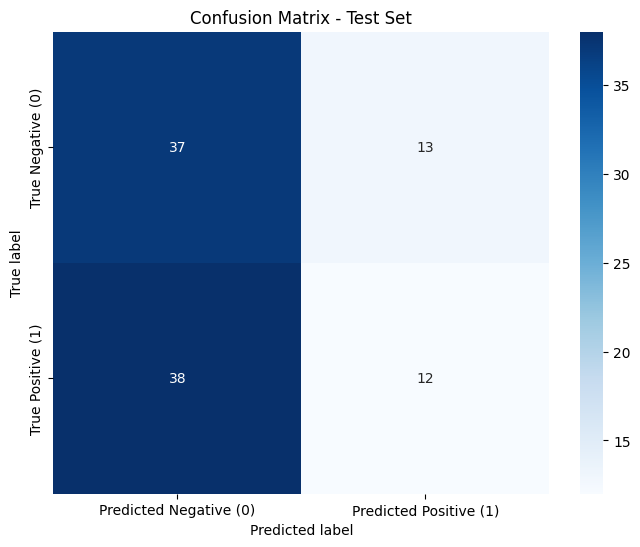

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59        50
           1       0.48      0.24      0.32        50

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.46       100
weighted avg       0.49      0.49      0.46       100


[True Negative]
Text: 體內暢快運動。全面升級輕鬆無負擔。高單位百億益菌定殖。耐酸實證把關菌種活力。多國專利世界大廠認可。吃好菌打造健康好體質。專利十益菌AAA。
True Label: 0
Pred Label: 0

[True Positive]
Text: 舒緩痠澀、拒絕模糊。0。倍抗氧。舒緩痠澀。模糊不清、乾澀緊繃、疲勞難消、難以集中。全方位呵護晶亮、拒絕模糊、舒緩痠澀、保持專注力、拒絕模糊。可幫助放鬆好對焦提升晶亮舒適。強效抗氧、舒緩痠澀、晶亮提升。0%。有效增強晶亮好晰力。歲健康年輕人的臨床實驗中食用澳佳寶同樣配方成分的年輕人對比安慰劑組000。個月內晶亮提升高達。晶亮表現有感。保持專注力、思緒運轉。幫助快速放鬆好對焦。全面提升晶亮舒適。強效抗氧成分各項檢驗標準都超越歐美藥典的嚴苛。
True Label: 1
Pred Label: 1

[False Negative]
Text: A是AAA胺基丁酸的縮寫屬於神經傳導物質可活化副交感神經達到舒緩放鬆。舒眠膠囊其他優勢減緩壓力、平衡焦慮情緒、促進抗氧化、舒緩腸胃不適。
True Label: 1
Pred Label: 0

[False Positive]
Text: 採用優良蛋場出品的新鮮液蛋。不添加人工色素香料防腐劑。製造過程堅持不加一滴水。蛋素可食。
True Label: 0
Pred Label: 1

[Random]
Text: 拉蓓超能纖汁專為繁忙的現代人打造輕鬆享受健康美

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test_bow is a dense array and y_test is numerical
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

# Predict probabilities and get class predictions
y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_dense, y_test_numerical)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Generate and print the classification report
report = classification_report(y_test_numerical, y_pred)
print("Classification Report:")
print(report)

# Generate and print examples
results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])

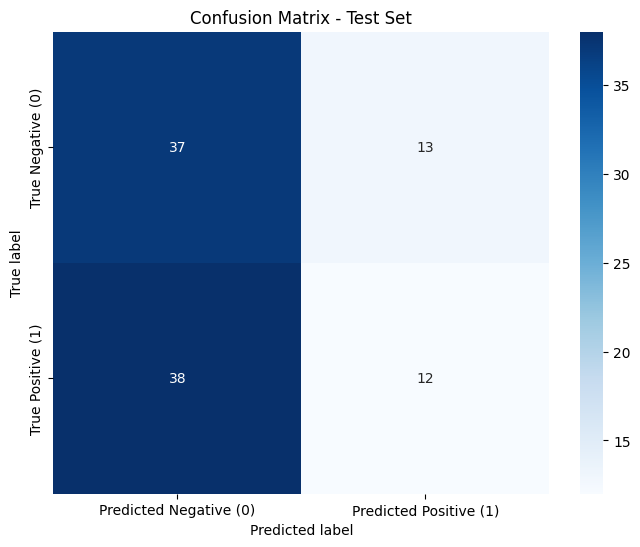

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [96]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59        50
           1       0.48      0.24      0.32        50

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.46       100
weighted avg       0.49      0.49      0.46       100



In [97]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

[True Negative]
Text: 黑暢酵益生菌000入添加黑棗精華專為您的腸道健康而設計。每日一粒幫助維持消化道機能讓您輕鬆迎接新的一天。排空困擾讓排便順暢成為您的新習慣。讓超炸排空成為您健康生活的必備良伴讓您活力充沛每天都充滿活力。
True Label: 0
Pred Label: 0

[True Positive]
Text: 纖體盈動輕盈排出體內積聚為了讓身心更加放鬆幫助身心進入一個更加寧靜的狀態有助於放鬆身心促進更好的睡眠品質。心情低落、經期不適連帶影響口氣、膚況、消化系統身體腸道不順皮膚乾燥暗沈每月經痛無力美麗心情纖體亦纖心不受痛經擾安神寧心降低血糖促進腸道蠕動利水滲濕。中藥材、漢材。喝了薏仁消濕茶後感到身體輕盈水腫減少對於便祕問題薏仁茶的效果相當出色。有助於緩解壓力喝了之後感到放鬆和安心。容易感冒的我黃耆活氣茶似乎增強了我的免疫系統讓我少了一些生病的次數。菊花睛明茶是我在工作長時間使用電腦後的最佳解藥喝了感到眼睛疲勞明顯減輕。對於眼睛容易疲勞和乾澀的問題菊花睛明茶是我找到的最好解決方法。漢方中藥。
True Label: 1
Pred Label: 1

[False Negative]
Text: 糖分、油脂熱量AAA。甜食控、外食油膩的最佳解。脂肪借過。A脂質阻隔脂肪吸收維持健康體態。A糖質阻隔澱粉吸收、減少熱量產生。邊吃邊燃燒卡路里。打擊糖質打擊脂質邊吃邊燃燒卡路里。服用糖分、油脂熱量AAA。
True Label: 1
Pred Label: 0

[False Positive]
Text: 拉蓓。燉雞精採用精煉純雞、剝皮辣椒、蛤蠣干貝三種珍貴食材經過精心燉煮而成。每一口都充滿濃厚的雞肉風味加上微辣的辣椒和鮮甜的蛤蠣干貝口感豐富多層次。不僅適合搭配飯菜更能單獨享用讓您感受到美味的享受。燉雞精讓您每天都能品嚐到新鮮美味的享受健康美味兼具讓您健康生活更加美好。
True Label: 0
Pred Label: 1

[Random]
Text: 台塑生醫。肌股力專研配方蘊含多種營養素有助於促進肌肉活力維持身體健康。配合健康飲食幫助調節生理機能提升活力與體力表現。
True Label: 0
Pred Label: 0


## (6) 預測資料⭐️⭐️⭐️
* 上傳預測題目 predict_sample.csv
    * ID
    * content_cleaned
* 前處理需要與預測資料一致
* 使用model.predict預測結果，並輸出為groupX_NAME_answer_v0.csv
    * X 組別
    * NAME 名字或代碼
    * v0 版本

In [98]:
import pandas as pd

# === 載入測試資料 ===
# 假設檔案放在同一個資料夾底下
predict_df = pd.read_csv("/content/sample_data/predict_sample.csv")
predict_df

,ID,content_cleaned
0,1,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...
1,2,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。
2,3,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...
3,4,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...
4,5,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...
...,...,...
95,96,\。A鱸魚精讓你輕鬆補充營養活力滿滿。術後補養首選。每天來一包。金目鱸魚精華。國家健康食品。...
96,97,學習領先關鍵。專為兒童設計。迷你可咀嚼軟膠囊好吞又好咬。無色素無人工香料寶貝補充好安心。
97,98,想豐胸促進胸部成長刺激女性荷爾蒙幫助發育促進乳腺管增長住膠原蛋白增生調理內分泌平衡荷爾蒙美肌...
98,99,買000送000拉蓓燉雞精精煉純雞搭配獨特配方簡單烹煮優雅濃郁的湯頭讓您享受美味的雞肉風味。...


In [99]:
# ====== 1. 對預測資料進行斷詞(如同3A) ======
predict_df["content_segmented"] = predict_df["content_cleaned"].apply(segment_text)

# ====== 2. 使用訓練過的 vectorizer 進行特徵轉換(如同3B) ======
# 只能用 transform，不能用 fit 或 fit_transform
# 因為 vectorizer 的詞彙表已經在訓練階段確定，不能改變
X_predict_bow = vectorizer.transform(predict_df["content_segmented"])

# ====== 3. 轉換成 Dense Tensor (如果4有進行此步驟) ======
X_predict_dense = X_predict_bow.todense()

# ====== 4. 使用訓練好的模型進行預(假設閾值為0.5) ======
y_proba = model.predict(X_predict_dense).ravel()   # 機率 0~1
y_pred = (y_proba >= 0.5).astype(int)              # 二元分類結果 0/1

# ====== 5. 輸出成 CSV 檔案 ======
output_df = pd.DataFrame({
    "ID": predict_df["ID"],
    "label": y_pred
})

output_file = "groupX_NAME_answer_v0.csv"
output_df.to_csv(output_file, index=False, encoding="utf-8-sig")
output_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


,ID,label
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
95,96,1
96,97,0
97,98,0
98,99,0
